# American Music Awards Tweets
CMSC320 Final Tutorial    
Made By: *Duy Nguyen, Bissaka Kenah, Henry Cheung*


# Introduction
This tutorial is an analysis on American Music Award (AMA) tweets from the year 2018.  The goal is to determine indicators that could predict the winners of the award show. The data for this tutorial comes from a Kaggle dataset containing 3,283 tweets that include the official hashtag #AMAs and 2,300 user ID (people who retweeted the Twitter voting tweet) from 4 days before the award show. This award show also allowed for Twitter voting, so the data set also contains tweet that announced this and the retweeters' IDs.
This tutorial will show how we tidied this data and provide insight into which common characteristics of tweets that alluded to the winners of the show, in order to determine winning indicators and furthermore “predict” the winners. This will be done though understanding which users are most successful in predicting the AMA winners and, essentially, why they are successful. One example indicator is location. Depending on the genre, the number of tweets about a song or artist in a certain location would be a strong predictor of who, or what song will win a category. For example, several tweets about Dua Lipa in Los Angeles, with the AMA hashtag, would be a good indicator of her winning the pop category, and therefore, can be used to predict the winner of that category.
This analysis will hopefully provide some insight into the role of viewer input in Music Award that it shows and how much, or how little, they take this input into account.


# Required Tools
To put together the tutorial, we used Jupyter Notebook since it includes Python and presents the dataset clearly. We used the libraries below in order to complete the analysis. The funcitons are listed alongside the libraries.
 - pandas - created dataframes in order to group and derive insights from data
 - numpy - helped manipulate dataframes though creating arrays which could be used as parametes for other functions
 - seaborn  - created visual statistical models which were paired with numerical statistical data in order to further interpret results
 - Matplotlib  - helped create and size plots in order to visualize the data
 - re - used to create regular expressions which would parse through tweets for relevant information
 - statsmodels - used in order to gather statistical data, including regression coefficients, thus identifying correlations that can be used for predictions.

In [1]:
# Import neccessary tools
import pandas as pd
import numpy as np 
import seaborn as sns
import re
import matplotlib.pyplot as plt
import statsmodels.api as sm 

# Data Preparation
The data is first downloaded from https://www.kaggle.com/eliasdabbas/american_music_awards_tweets. It contains CSV (comma-seprated value) files that has data of tweets related to the American Music Awards in 2018. We load the CSV files into the notebook using Pandas; a software library written for the Python programming language for data manipulation. analysis.

In [2]:
# Load data into a dataframe
data = pd.read_csv("amas_combined.csv", low_memory= False)
# Take a peek at the dataframe
data.head(10)

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified,tweet_source_url
0,NaN,NaN,10/10/18 8:04,"[0, 47]","{'hashtags': [{'text': 'AMAs', 'indices': [19,...",NaN,0,False,RTT marcellejoseph #AMAs #ArianaGrande #AMAsTNT,NaN,...,True,False,songscri,86608,NaN,none,NaN,NaN,False,https://ifttt.com
1,NaN,NaN,10/10/18 8:04,"[0, 47]","{'hashtags': [{'text': 'AMAs', 'indices': [19,...",NaN,0,False,RTT EvelynMarshall #AMAs #ArianaGrande #AMAsTNT,NaN,...,True,False,songscri,86608,NaN,none,NaN,NaN,False,https://ifttt.com
2,NaN,NaN,10/10/18 8:04,"[0, 44]","{'hashtags': [{'text': 'AMAs', 'indices': [16,...",NaN,0,False,RTT Outcastlive #AMAs #ArianaGrande #AMAsTNT,NaN,...,True,False,songscri,86608,NaN,none,NaN,NaN,False,https://ifttt.com
3,NaN,NaN,10/10/18 8:04,"[0, 45]","{'hashtags': [{'text': 'AMAs', 'indices': [17,...",NaN,0,False,RTT TransitFeeds #AMAs #ArianaGrande #AMAsTNT,NaN,...,True,False,songscri,86608,NaN,none,NaN,NaN,False,https://ifttt.com
4,NaN,NaN,10/10/18 8:04,"[0, 68]","{'hashtags': [{'text': 'AMAs2018', 'indices': ...",NaN,0,False,If @NICKIMINAJ isn’t at the #AMAs2018 #AMAs it...,NaN,...,True,False,barbieboyminaj,2227,NaN,none,NaN,NaN,False,http://twitter.com/download/iphone
5,NaN,NaN,10/10/18 8:04,"[0, 45]","{'hashtags': [{'text': 'AMAs', 'indices': [17,...",NaN,0,False,RTT cabematthews #AMAs #ArianaGrande #AMAsTNT,NaN,...,True,False,songscri,86608,NaN,none,NaN,NaN,False,https://ifttt.com
6,NaN,NaN,10/10/18 8:04,"[0, 45]","{'hashtags': [{'text': 'AMAs', 'indices': [17,...",NaN,0,False,RTT EyesOpen_mag #AMAs #ArianaGrande #AMAsTNT,NaN,...,True,False,songscri,86608,NaN,none,NaN,NaN,False,https://ifttt.com
7,NaN,NaN,10/10/18 8:04,"[0, 50]","{'hashtags': [{'text': 'AMAs', 'indices': [32,...","{'media': [{'id': 1049933549472636928, 'id_str...",0,False,Halsey on the red carpet at the #AMAs⁠ ⁠ 2018 ...,NaN,...,False,False,halseyph,5098,NaN,none,https://t.co/RRAvKa5hqB,NaN,False,http://twitter.com/download/iphone
8,NaN,NaN,10/10/18 8:04,"[0, 74]","{'hashtags': [{'text': 'AMAs', 'indices': [35,...","{'media': [{'id': 1049933560428163072, 'id_str...",0,False,Uitslag American Music Awards 2018\n#AMAs #AMA...,NaN,...,False,False,country_nl,5630,NaN,none,http://t.co/H14yrcsrBx,NaN,False,http://publicize.wp.com/
9,NaN,NaN,10/10/18 8:04,"[0, 100]","{'hashtags': [{'text': 'AMAs', 'indices': [69,...","{'media': [{'id': 1049933560293933057, 'id_str...",0,False,En fotos: así se presentaron los artistas en l...,NaN,...,False,False,noticias24,1531150,NaN,none,http://t.co/xJa3Jmn5nj,NaN,True,http://socialtoctoc.com/noticias24


## Data Tidying
The data table contains many unneeded columns and take alot of space in the dataframe. We need to drop most of the columns to keep the dataframe clean and simple. As a result, we only kept the full text of the tweet, the tweet's id, the user description, and the amount of retweets the tweet got.

In [3]:
# Drop the unnecessary columns
needed_columns = ['tweet_full_text', 'tweet_id', 'user_description', 'tweet_retweet_count']
for col_name in data.columns:
    if col_name not in needed_columns:
        data = data.drop(col_name, 1)
# Rearange order of columns
data = data[['tweet_id', 'user_description', 'tweet_full_text','tweet_retweet_count']]
data.head()

,tweet_id,user_description,tweet_full_text,tweet_retweet_count
0,1.049930e+18,.,RTT marcellejoseph #AMAs #ArianaGrande #AMAsTNT,0
1,1.049930e+18,.,RTT EvelynMarshall #AMAs #ArianaGrande #AMAsTNT,0
2,1.049930e+18,.,RTT Outcastlive #AMAs #ArianaGrande #AMAsTNT,0
3,1.049930e+18,.,RTT TransitFeeds #AMAs #ArianaGrande #AMAsTNT,0
4,1.049930e+18,NICKI MINAJ is my Queen! I’m a proud American ...,If @NICKIMINAJ isn’t at the #AMAs2018 #AMAs it...,0


We want to classify each tweet of a nominee of the Music Awards. To do this, we make a regular expression (regex) for each nominee then apply a classifier function to each tweet_full_text in the dataframe. We then have a new column with classifier. 

In [4]:
# regex for all nominees
TAYLOR_SWIFT = r"(?i)(taylor swift|#taylor|taylor|taylorswift13|#taylorswift)"
DRAKE = r"(?i)(drake|drizzy)"
IMAGINE_DRAGONS = r"(?i)(imagine dragons|dragons|imaginedragons|imagine dragon|imaginedragon)"
MIGOS = r"(?i)(migos)"
POST_MALONE = r"(?i)(post malone|posty|postmalone|malone)"
ED_SHEERAN = r"(?i)(edsheeran|ed sheeran|sheeran)"
CAMILA = r"(?i)(camila_cabello|camila|cabello)"
CARDI = r"(?i)(iamcardib|cardi|cardi b)"
DUA = r"(?i)(dualipa|dua|lipa)"
KHALID = r"(?i)(thegreatkhalid|khalid)"
TENTACION = r"(?i)(xxxtentacion|tentacion|xxx)"
BRUNO = r"(?i)(bruno)"
BEBE = r"(?i)(beberexha|bebe|rexha)"
ZEDD = r"(?i)(zedd|zed)"
ARIANA = r"(?i)(arianagrande|ariana|grande)"
DEMI = r"(?i)(ddlovato|demi|lovato)"
SHAWN = r"(?i)(shawnmendes|shawn|mendes)"
MAROON = r"(?i)(maroon5|maroon|adamlevine|levine)"
KANE_BROWN = r"(?i)(kanebrown|kane|brown)"
LUKE_BRYAN = r"(?i)(lukebryanonline|luke|bryan)"
THOMAS_RHETT = r"(?i)(thomasrhett|thomas|rhett)"
CARRIE = r"(?i)(carrieunderwood|underwood|carrie)"
KELSEA = r"(?i)(kelseaballerini|kelsea|ballerini)"
MAREN = r"(?i)(marenmorris|maren|morris)"
FLORIDA_GEORGIA = r"(?i)(flagaLine|florida georgia line|fgl|florida|georgia)"
DAN_SHAY = r"(?i)(danandshay|dan and shay|dan \+ shay)"
LANCO = r"(?i)(lancomusic|lanco)"
LIL_UZI = r"(?i)(liluzivert|lil uzi|uzi)"
RIHANNA = r"(?i)(rihanna)"
ELLA = r"(?i)(ellamai|ella|mai)"
SZA = r"(?i)(\bSZA\b|@SZA|#SZA)"
BTS = r"(?i)(\bBTS\b|@bts_bighit|#BTS)"
PINK = r"(?i)(pink|p!nk)"
PANIC_DISCO = r"(?i)(panicatthedisco|panic at the disco|patd|panic)"
PORTUGAL = r"(?i)(portugaltheman|ptm|portugal)"
DADDY_YANKEE = r"(?i)(daddy_yankee|daddy yankee|yankee)"
BALVIN = r"(?i)(jbalvin|balvin)"
OZUNA = r"(?i)(ozuna)"
LAUREN = r"(?i)(lauren_daigle|lauren daigle|daigle)"
MERCY_ME = r"(?i)(mercyme|mercy me)"
ZACH_WILL = r"(?i)(zachwilliams|zach williams|williams)"
MARSHMELLO = r"(?i)(marshmello|marshmellomusic)"
CHAIN_SMOKERS = r"(?i)(thechainsmokers|chainsmokers|chainsmoker)"

We can start using the regex variables above to make a classifier function to separate the tweets based on the artists that were mentioned in the tweets.

In [5]:
# Function that classify nominee given string
def classifier(row):
    if re.search(TAYLOR_SWIFT, row['tweet_full_text']) != None:
        return "Taylor Swift"
    elif re.search(DRAKE, row['tweet_full_text']) != None:
        return "Drake"  
    elif re.search(IMAGINE_DRAGONS, row['tweet_full_text']) != None:
        return "Imagine Dragons"
    elif re.search(MIGOS, row['tweet_full_text']) != None:
        return "Migos"
    elif re.search(POST_MALONE, row['tweet_full_text']) != None:
        return "Post Malone"
    elif re.search(ED_SHEERAN, row['tweet_full_text']) != None:
        return "Ed Sheeran"
    elif re.search(CAMILA, row['tweet_full_text']) != None:
        return "Camila Cabello"      
    elif re.search(CARDI, row['tweet_full_text']) != None:
        return "Cardi B"
    elif re.search(DUA, row['tweet_full_text']) != None:
        return "Dua Lipa"    
    elif re.search(KHALID, row['tweet_full_text']) != None:
        return "Khalid"
    elif re.search(TENTACION, row['tweet_full_text']) != None:
        return "XXXTentacion"
    elif re.search(BRUNO, row['tweet_full_text']) != None:
        return "Bruno Mars"
    elif re.search(BEBE, row['tweet_full_text']) != None:
        return "Bebe Rexha"     
    elif re.search(ZEDD, row['tweet_full_text']) != None:
        return "Zedd"
    elif re.search(ARIANA, row['tweet_full_text']) != None:
        return "Ariana Grande"
    elif re.search(DEMI, row['tweet_full_text']) != None:
        return "Demi Lavoto"
    elif re.search(SHAWN, row['tweet_full_text']) != None:
        return "Shawn Mendes"
    elif re.search(MAROON, row['tweet_full_text']) != None:
        return "Maroon 5"
    elif re.search(KANE_BROWN, row['tweet_full_text']) != None:
        return "Kane Brown"
    elif re.search(LUKE_BRYAN, row['tweet_full_text']) != None:
        return "Luke Bryan"
    elif re.search(THOMAS_RHETT, row['tweet_full_text']) != None:
        return "Thomas Rhett"   
    elif re.search(CARRIE, row['tweet_full_text']) != None:
        return "Carrie Underwood"
    elif re.search(KELSEA, row['tweet_full_text']) != None:
        return "Kelsea Ballerini"  
    elif re.search(MAREN, row['tweet_full_text']) != None:
        return "Maren Morris"
    elif re.search(FLORIDA_GEORGIA, row['tweet_full_text']) != None:
        return "Florida Georgia Line"
    elif re.search(DAN_SHAY, row['tweet_full_text']) != None:
        return "Dan + Shay"
    elif re.search(LANCO, row['tweet_full_text']) != None:
        return "LANCO"
    elif re.search(LIL_UZI, row['tweet_full_text']) != None:
        return "Lil Uzi Vert"
    elif re.search(RIHANNA, row['tweet_full_text']) != None:
        return "Rihanna"
    elif re.search(ELLA, row['tweet_full_text']) != None:
        return "Ella Mai"
    elif re.search(SZA, row['tweet_full_text']) != None:
        return "SZA"
    elif re.search(PINK, row['tweet_full_text']) != None:
        return "P!NK"
    elif re.search(PANIC_DISCO, row['tweet_full_text']) != None:
        return "Panic! At The Disco"   
    elif re.search(PORTUGAL, row['tweet_full_text']) != None:
        return "Portugal. The Man"
    elif re.search(DADDY_YANKEE, row['tweet_full_text']) != None:
        return "Daddy Yankee"
    elif re.search(BALVIN, row['tweet_full_text']) != None:
        return "J Balvin" 
    elif re.search(OZUNA, row['tweet_full_text']) != None:
        return "Ozuna"   
    elif re.search(LAUREN, row['tweet_full_text']) != None:
        return "Lauren Daigle"  
    elif re.search(MERCY_ME, row['tweet_full_text']) != None:
        return "MercyMe"
    elif re.search(ZACH_WILL, row['tweet_full_text']) != None:
        return "Zach Williams"
    elif re.search(MARSHMELLO, row['tweet_full_text']) != None:
        return "Marshmello"
    elif re.search(CHAIN_SMOKERS, row['tweet_full_text']) != None:
        return "Chainsmokers" 
    elif re.search(BTS, row['tweet_full_text']) != None:
        return "BTS"                      

With the function above, we can apply the function to each tweet text in order to classify them into their own category. This represents which nominee the tweet was referring to.

In [6]:
# Now, to classify the dataframe
data['Nominee'] = data.apply(classifier, axis=1)
data

,tweet_id,user_description,tweet_full_text,tweet_retweet_count,Nominee
0,1.049930e+18,.,RTT marcellejoseph #AMAs #ArianaGrande #AMAsTNT,0,Ariana Grande
1,1.049930e+18,.,RTT EvelynMarshall #AMAs #ArianaGrande #AMAsTNT,0,Ariana Grande
2,1.049930e+18,.,RTT Outcastlive #AMAs #ArianaGrande #AMAsTNT,0,Ariana Grande
3,1.049930e+18,.,RTT TransitFeeds #AMAs #ArianaGrande #AMAsTNT,0,Ariana Grande
4,1.049930e+18,NICKI MINAJ is my Queen! I’m a proud American ...,If @NICKIMINAJ isn’t at the #AMAs2018 #AMAs it...,0,None
...,...,...,...,...,...
57459,1.049560e+18,Just for Kris Wu .花,@galaxy_nini1201 @AMAs @securitybenefit @KrisW...,1,None
57460,1.049560e+18,จงขังฉันไว้ในหัวใจ 🖤 YOUNG ONE . SON...,เริ่มลุ้นชุด #AMAs แล้ว,1,None
57461,1.049560e+18,I believe we are here to love and be loved‼️ -...,I just voted for @Camila_Cabello for New Artis...,3,Camila Cabello
57462,1.049560e+18,NaN,#KrisWu #AMAs Kris Wu - Freedom ft. Jhené Aiko...,0,None


Some of the text will be unclassified due to language or no mention of any nominee.

In [7]:
# Make another dataframe only containing the nominees and number of times they were classified
nominee_series = data['Nominee'].value_counts()
nom_df = pd.DataFrame({'nominee': nominee_series.index, 'mentions': nominee_series.values})
nom_df

,nominee,mentions
0,Camila Cabello,9486
1,Taylor Swift,5109
2,BTS,4829
3,Shawn Mendes,2278
4,Cardi B,2246
5,Dua Lipa,1223
6,Ella Mai,724
7,XXXTentacion,518
8,Post Malone,286
9,Ariana Grande,276


We made a new table that counts how many times a nominee is mentioned. We can use this to make a bargraph to present this visually. 

Text(0, 0.5, 'Nominee')

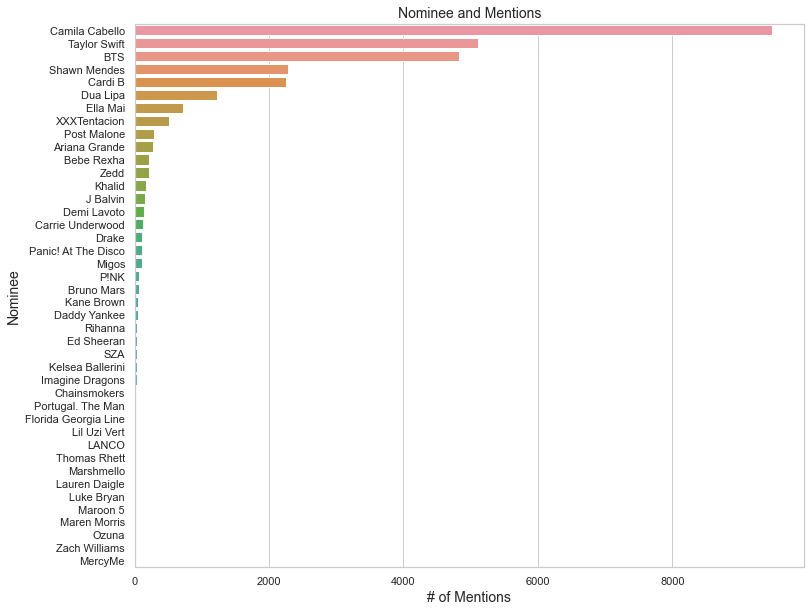

In [8]:
# Time to make the bar graph
plt.figure(figsize = (12, 10))
sns.set_theme(style="whitegrid")
sns.barplot(x = "mentions", y="nominee", data=nom_df)
plt.title("Nominee and Mentions", fontsize=14)
plt.xlabel("# of Mentions", fontsize=14)
plt.ylabel("Nominee", fontsize=14)

When taking a look at the number of mentions, the most popular by far during the 2018 AMAs looked to be Camila Cabello with 
over 9000 votes with no other artists getting close.
Both Taylor Swift, and BTS were fairly close to each other in that both were around 4800 to 5100 mentions or so. In 
comparisson, both Shawn Mendes, and Cardi B only recieved a little over 2000 mentions which in comparisson is less than half of
the votes both Taylor, and BTS got each. It only gets smaller as aside from Dua Lipa, no other artists that were nominated 
cracked above four digit mentions.

## Preparing the trending data

Now, we will analyze the trending topics on Twitter as of October 9th, 2018.

In [9]:
trend_data = pd.read_csv('trends_combined.csv')
# Take a peek 
trend_data.head(10)

,name,query,tweet_volume,url,location,woeid,time
0,America,America,656323.0,http://twitter.com/search?q=America,Albuquerque,2352824,2018-10-09 22:39:00
1,#AMAs,%23AMAs,439388.0,http://twitter.com/search?q=%23AMAs,Albuquerque,2352824,2018-10-09 22:39:00
2,New Mexico,%22New+Mexico%22,63126.0,http://twitter.com/search?q=%22New+Mexico%22,Albuquerque,2352824,2018-10-09 22:39:00
3,James Gunn,%22James+Gunn%22,33083.0,http://twitter.com/search?q=%22James+Gunn%22,Albuquerque,2352824,2018-10-09 22:39:00
4,Category 3,%22Category+3%22,32153.0,http://twitter.com/search?q=%22Category+3%22,Albuquerque,2352824,2018-10-09 22:39:00
5,Met Gala,%22Met+Gala%22,27064.0,http://twitter.com/search?q=%22Met+Gala%22,Albuquerque,2352824,2018-10-09 22:39:00
6,Google Pixel 3,%22Google+Pixel+3%22,26637.0,http://twitter.com/search?q=%22Google+Pixel+3%22,Albuquerque,2352824,2018-10-09 22:39:00
7,#IndigenousPeoplesDay2018,%23IndigenousPeoplesDay2018,17536.0,http://twitter.com/search?q=%23IndigenousPeopl...,Albuquerque,2352824,2018-10-09 22:39:00
8,#RegularChallenge,%23RegularChallenge,15148.0,http://twitter.com/search?q=%23RegularChallenge,Albuquerque,2352824,2018-10-09 22:39:00
9,#RegisterAndVote,%23RegisterAndVote,12268.0,http://twitter.com/search?q=%23RegisterAndVote,Albuquerque,2352824,2018-10-09 22:39:00


Some of the columns are not needed such as the query, url, woeid, and time. The important ones kept in the table are the name of the trend, volume, and location. 

In [10]:
# Drop unnecessary columns
trend_data = trend_data.drop('query', 1)
trend_data = trend_data.drop('url', 1)
trend_data = trend_data.drop('woeid', 1)
trend_data = trend_data.drop('time', 1)
trend_data.head(10)

,name,tweet_volume,location
0,America,656323.0,Albuquerque
1,#AMAs,439388.0,Albuquerque
2,New Mexico,63126.0,Albuquerque
3,James Gunn,33083.0,Albuquerque
4,Category 3,32153.0,Albuquerque
5,Met Gala,27064.0,Albuquerque
6,Google Pixel 3,26637.0,Albuquerque
7,#IndigenousPeoplesDay2018,17536.0,Albuquerque
8,#RegularChallenge,15148.0,Albuquerque
9,#RegisterAndVote,12268.0,Albuquerque


Though, as you can see, some of the trending topics on Twitter are not at all related to the American Music Awards. As a result, we need to filter them out.

In [11]:
nominees = nom_df['nominee']
# Match trend since there is no trend of 'Camila Cabello'
nominees[0] = 'Camila'
nom_trend = trend_data.copy()
# Drop the rows with no mention of any of the nominees
for index, row in nom_trend.iterrows():
    found = False
    for n in nominees:
        if row['name'] == n:
            found = True
    if found == False:
        nom_trend.drop(index, inplace = True)
nom_trend

/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,tweet_volume,location
2191,Taylor Swift,250758.0,Phoenix
2291,Taylor Swift,249522.0,Portland
3180,Camila,1020268.0,Albuquerque
3185,Khalid,37706.0,Albuquerque
3186,Shawn Mendes,35606.0,Albuquerque
...,...,...,...
20414,Taylor Swift,268699.0,Philadelphia
20463,Taylor Swift,268699.0,Phoenix
20562,Taylor Swift,267905.0,Portland
21842,Cardi B,67552.0,Chicago


Now that the dataframe is filtered, the dataframe needs to be grouped by name, taking the mean of the tweet_volume per name. There are some nominees that are missing. That's because they either trended too late or they didn't have enough tweets to trend. 

In [12]:
# Group by name
group_df = nom_trend.drop('location', 1).groupby(['name']).mean()
group_df = group_df.reset_index()
group_df = group_df.sort_values(by='tweet_volume', ascending=False)
group_df = group_df.dropna()
group_df

,name,tweet_volume
0,Camila,1.034901e+06
8,Taylor Swift,2.721614e+05
3,Drake,7.571300e+04
1,Cardi B,6.755200e+04
7,Shawn Mendes,4.029356e+04
5,Khalid,3.883995e+04
6,Post Malone,2.632017e+04


This dataframe will tell us how popular the above nominees are in trends. We can visualize this using a bargraph similar to before.

Text(0, 0.5, 'Tweet Volume')

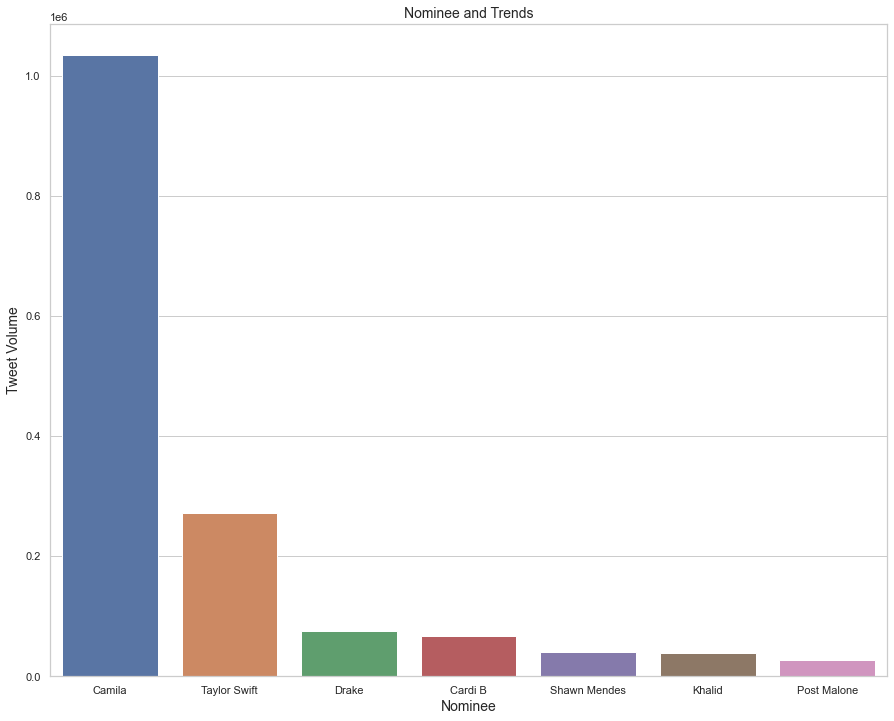

In [13]:
# Time to make the bar graph
plt.figure(figsize = (15, 12))
sns.set_theme(style="whitegrid")
sns.barplot(x = "name", y="tweet_volume", data=group_df)
plt.title("Nominee and Trends", fontsize=14)
plt.xlabel("Nominee", fontsize=14)
plt.ylabel("Tweet Volume", fontsize=14)

The trending artists graph looks somewhat similar to the amount of tweets that mentioned the artists with quite
a few exceptions. Some artists such as Camila Cabello, Taylor Swift,and Cardi B still are trending substantially, but some of the other artists that were mentioned such as BTS do not appear on the trending list.This is due to the popularity of the nominees and how soon the nominees started trending as stated earlier. If a nominee is not popular enough, or trend too late then they will not trend and be considered missing. 

## Graphing the tweet volume per location

Next, we will take a look at the locations of the trends. This will be first visualized as a table, and later be converted to a bar graph.

In [14]:
# We can group by location 
loc_df = nom_trend.drop('name', 1).groupby(['location']).sum()
loc_df = loc_df.reset_index()
loc_df = loc_df.sort_values(by='tweet_volume', ascending=False)
loc_df

,location,tweet_volume
46,Portland,2820806.0
44,Phoenix,2660417.0
27,Long Beach,2380677.0
8,Chicago,2117247.0
3,Baltimore,1838701.0
...,...,...
7,Charlotte,1254910.0
4,Baton Rouge,1254534.0
20,Honolulu,1254534.0
0,Albuquerque,1254534.0


Text(0, 0.5, 'Location')

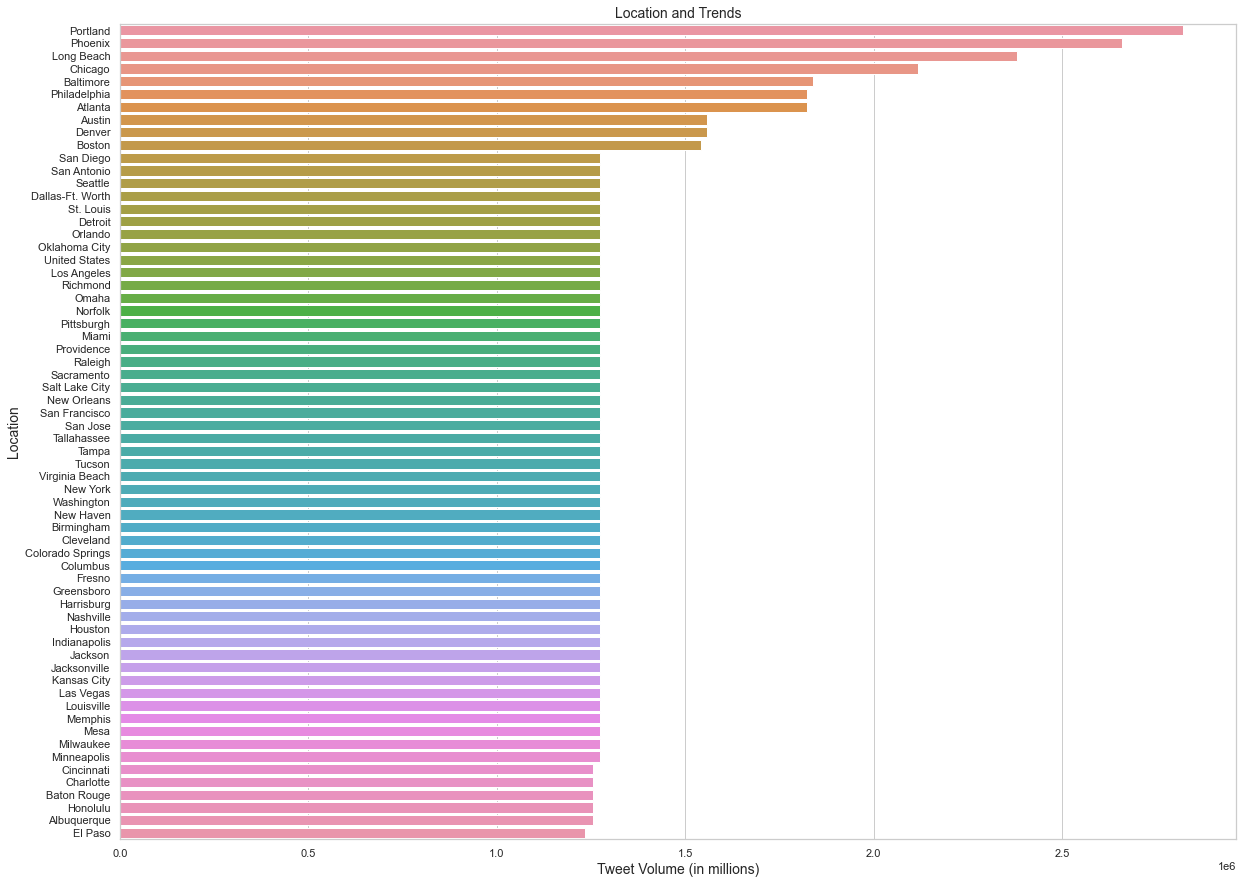

In [15]:
# Time to make the bar graph
plt.figure(figsize = (20, 15))
sns.set_theme(style="whitegrid")
sns.barplot(x = "tweet_volume", y="location", data=loc_df)
plt.title("Location and Trends", fontsize=14)
plt.xlabel("Tweet Volume (in millions)", fontsize=14)
plt.ylabel("Location", fontsize=14)

From the graph, we can see that Portland, Phoenix, Long Beach, and Chicago are the top cities with the highest tweet volume talking about the AMAs. Though, Portland leads with over 2.8 million tweets or so with Phoenix not far behind with around 2.6 million tweets with Long Beach, and Chicago having over 2 million tweets about the AMAs.

We can also see that the majority of the major metropolitan cities have very similar tweet volumes of around 1.25 million tweets after Boston which is the last major city whose tweet volume is over 1.5 million. 

## Graphing the Top 5 Cities

In this section, we will graph the top 4 tweet volumes which are Portland, Phoenix, Long Beach, and Chicago. This analysis is to find how influential certain nominees are in certain cities, and a way to measure this is the tweet volume below.

We will first be measuring the tweet volume of artists in Portland in a table first, and then converting it to a bar graph later on.

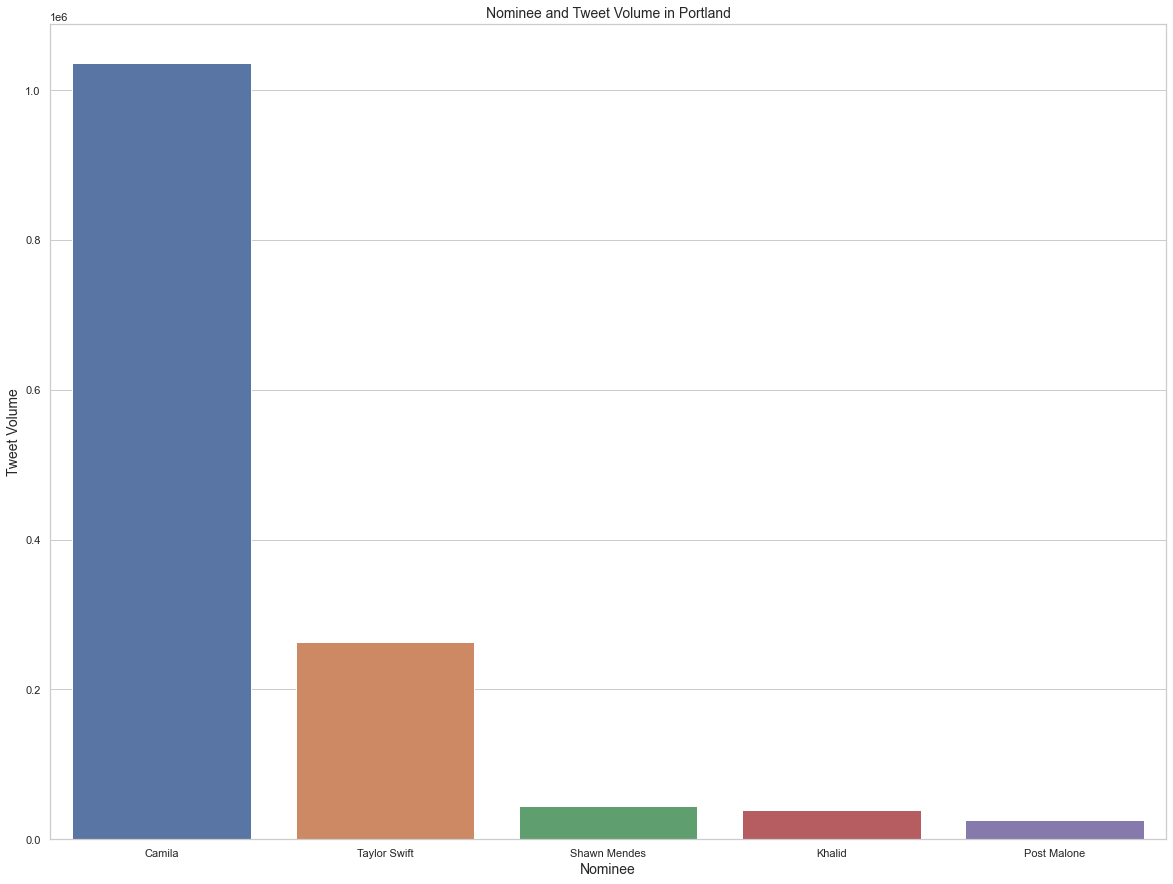

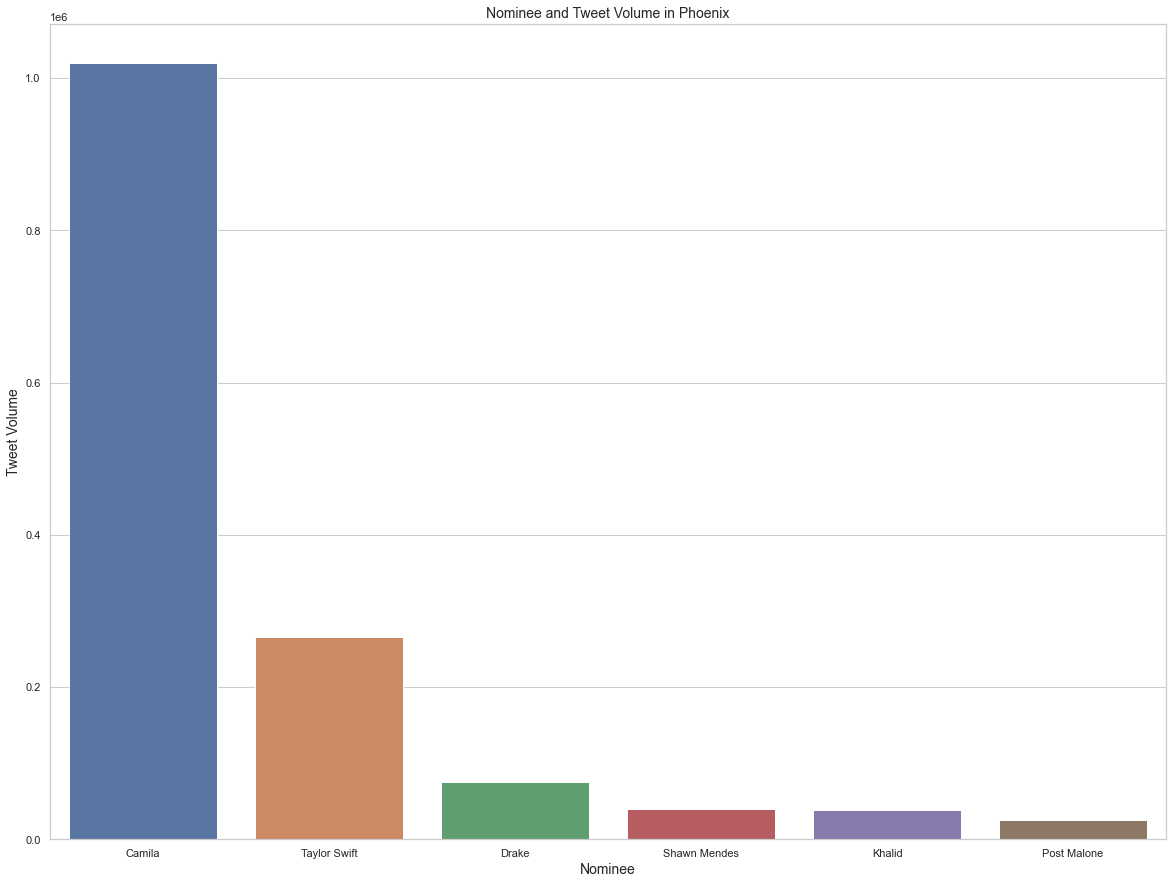

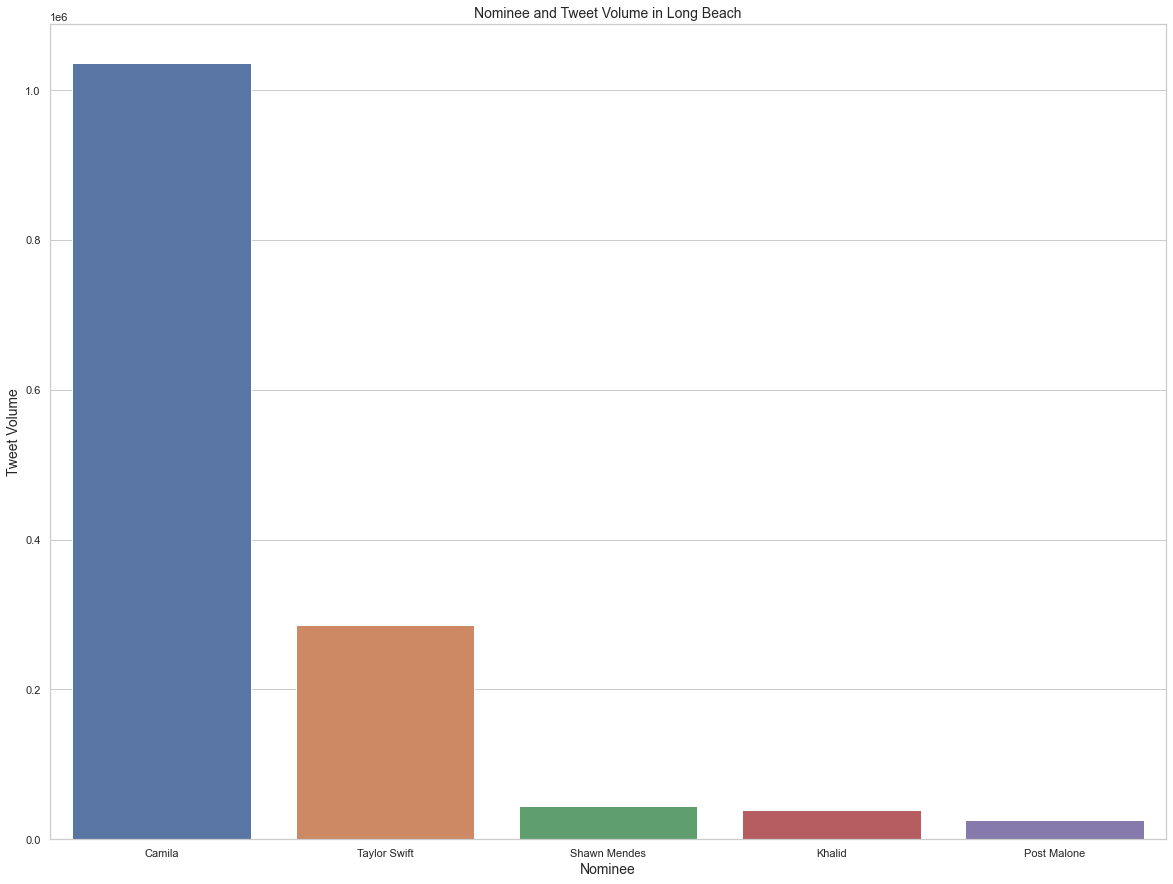

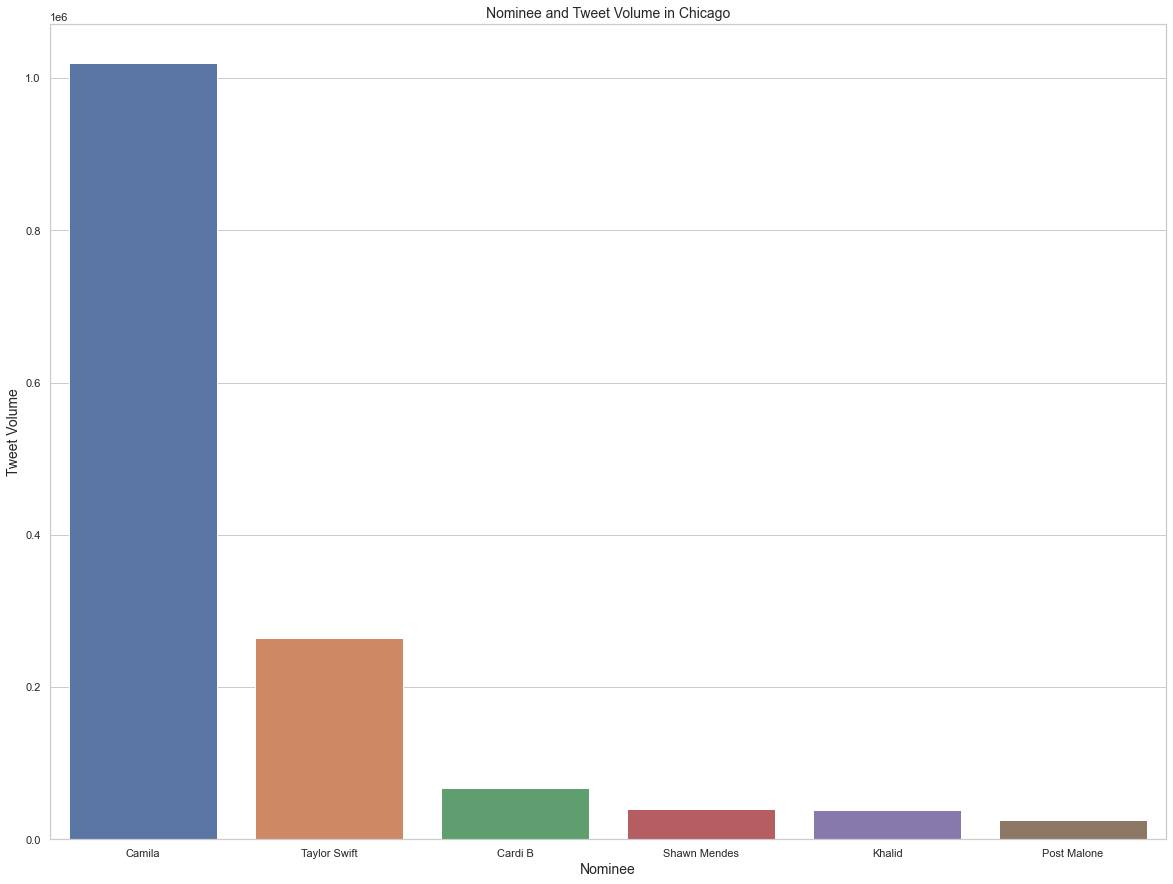

In [16]:
# Making the 5 Graphs 
# Array of the top 4 cities
cities = ['Portland' , 'Phoenix' , 'Long Beach' , 'Chicago']
# Make a bargraph on the top 4 Cities in tweet volume
for city in cities:
    temp_df = nom_trend[nom_trend['location'] == city]
    temp_df  = temp_df.groupby(['name']).mean()
    temp_df  = temp_df.reset_index()
    temp_df  = temp_df.sort_values(by='tweet_volume', ascending=False)
    temp_df = temp_df.dropna()
    plt.figure(figsize = (20, 15))
    sns.set_theme(style="whitegrid")
    sns.barplot(x = "name", y="tweet_volume", data=temp_df)
    plt.title("Nominee and Tweet Volume in " + city, fontsize=14)
    plt.xlabel("Nominee", fontsize=14)
    plt.ylabel("Tweet Volume", fontsize=14)
    plt.show()

For the most part, this sort of adherence to the national consensus is rather similar across all five of the cities with each of them having their exceptions. For all of them, Camila Cabello dominates at #1 while Taylor Swift takes the #2 spot consistently. After the top two though, many cities start to have some differences in them.

Let's start off with Portland whose graphs is rather similar to the national graph, but with a fair few differences after Camila Cabello, and Taylor Swift taking the top two spots. One part that is rather striking is the tweet volume of Cardi B, and Drake are absent on the graph as they do not appear whatsoever on the graph for Portland, but appear on the nationwide tweet volume graph. Instead, Shawn Mendes, Khalid, and Post Malone take the rest of the visible tweet volume graph for Portland which does fall in line with much of the rest of the country.

As we can see with the other city graphs, there are two cities that have their own variance to the plot in that they have different artists at the #3 spot. With cities like Chicago, we can see that Cardi B is the one holding the spot while the other popular artists such as Shawn Mendes, Khalid, and Post Malone wrap up the other positions. Meanwhile, Drake has the #3 spot in Phoenix with the rest of the other popular artists taking the next few positions downwards. In comparisson, Long Beach is basically on point with the national tweet volume graph with no notiable exception when basing it off the original graph.

## Statistical Analysis

**Chances of Winning vs. Mentions**

In this upcoming section, we are taking a look at the winners of each category in the 2018 AMAs, and comparing it to the sheer amount of mentions that an artist had. We are first detailing the winners of each category in a table below.

In [17]:
#Load data into a dataframe
data_stat = pd.read_csv("categories_winners.csv", low_memory= False)
#Take a peek at the dataframe
data_stat.head(10)

,Category,Winners
0,Favorite Artist - Alternative Rock,Panic! At The Disco
1,Favorite Artist - Adult Contemporary,Shawn Mendes
2,Favorite Artist - Latin,Daddy Yankee
3,Favorite Artist - Contemporary Inspirational,Lauren Daigle
4,Favorite Artist – Electronic Dance Music (EDM),Marshmello
5,Favorite Soundtrack,"“Black Panther: The Album, Music From And Insp..."
6,Favorite Social Artist,BTS
7,New Artist of the Year,Camila Cabello
8,Collaboration of the Year,Camila Cabello ft. Young Thug “Havana”
9,Artist Of The Year,Taylor Swift


This cell appends a column to the nom_df table determining if the nominee won or not in the 2018 AMAs. The representation of whether or not the artist won a nomination has a 1 marked under their row, and those who did not win have a 0 marked instead.

In [18]:
# Statistical analysis - plot wins vs mentions
nom_df['Win?'] = 0
for i in range (0, len(nom_df['nominee'])):
    for j in range (0, len(data_stat['Winners'])):
        if nom_df.at[i, 'nominee'] in data_stat.at[j, 'Winners'] :
            nom_df['Win?'].loc[nom_df.nominee == nom_df.at[i, 'nominee']] = 1


nom_df.head(10)


/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,nominee,mentions,Win?
0,Camila,9486,1
1,Taylor Swift,5109,1
2,BTS,4829,1
3,Shawn Mendes,2278,1
4,Cardi B,2246,1
5,Dua Lipa,1223,0
6,Ella Mai,724,0
7,XXXTentacion,518,0
8,Post Malone,286,1
9,Ariana Grande,276,0


We are going to create a logistic regression, and plot showing the impact that the amount of mention of an artist has on the chances on them winning. 

/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


Optimization terminated successfully.
         Current function value: 0.647075
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Win?   No. Observations:                   42
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.04122
Time:                        09:52:27   Log-Likelihood:                -27.177
converged:                       True   LL-Null:                       -28.346
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mentions       0.0005      0.000      1.310      0.190      -0.000       0.001


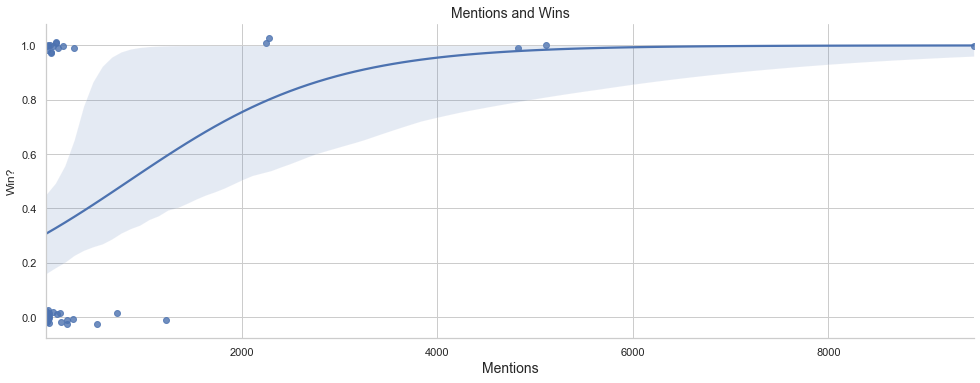

In [19]:
#Regression and analysis
log_reg = sm.Logit(nom_df['Win?'], nom_df.mentions).fit()
s = sns.lmplot(x = "mentions", y="Win?", data=nom_df, logistic=True, n_boot=500, y_jitter=.03)
plt.title("Mentions and Wins", fontsize=14)
plt.xlabel("Mentions", fontsize=14)
s.fig.set_size_inches(15,5)
print(log_reg.summary()) 

From the graph, we can see that while having a ton of mentions makes it substantially more likely that the artist would win a category at the show, there are still a ton of artists who only had a fraction of the mentions of many of the more popular artists who also won a category at the show.

From the logistic regression, the data shows a positive correlation between the number of mentions, and the likelihood of winning a nomination at the show. But, it is not by much, and it is not a strong correlation based off the p-value. As a result, we would need to reject the hypothesis that was mentioned quite a bit ago about how the artist's popularity would basically guarantee a winning spot at the 2018 AMAs.

This is due to the amount of winners who had far less mentions, and popularity compared to their peers, and yet still won a nomination. Usually with awards shows, they are not always popularity contests in that getting the winners for each category have other factors other than say how many mentions or interactions they get on Twitter. Categories are also pre-determinded from the start. This includes genres such as country, electronic dance music (EDM) and alternative rock who had nomiations who basically had very small sections to no section on the trending graph whatsoever.

When looking at the logistic regression, one might ask as to why this model work out. When it comes to using a binary logistic regression, it requires the dependent variable to be binary being whether or not an artist won or not, and the observations to be independent of each other. The data set also requires there to be little or no multicollinearity among the independent variables which in this case are the mentions of each artists at the 2018 AMAs. It also assumes the linearity of independent variables, and log odds. Finally, these sorts of logistic regressions typically need a fairly large sample size with around a minimum of 10 cases with the least frequent outcome for each independent variable or in this case, Twitter mentions in the model. For the most part, there are hundreds to thousands of mentions of each artists in the graph, and with the amount of artists nominated at the AMAs, this requirement is met. 

Some more information as to why this model was used can be glanced at [here](https://www.statisticssolutions.com/assumptions-of-logistic-regression/).

**Trends vs Win**
The two following code blocks essentially duplicate the experiment above (and the corresponding code), but instead of showing the relationship between mentions and chances of winning, they show the relationship between whther or not an artist trended and their chances of winning. This was done by including dataframe column denoting whether or not the artist trended using a binary variable, then creating a logistic regression based on that data, and data on whether or not the artist won.

In [20]:
#add new variable
nom_df['Trend?'] = 0
group_df = group_df.dropna()
group_df = group_df.reset_index(drop=True)
print(group_df)
for i in range (0, len(nom_df['nominee'])):
    for j in range (0, len(group_df['name'])):
        if nom_df.at[i, 'nominee'] in group_df.at[j, 'name'] :
            nom_df['Trend?'].loc[nom_df.nominee == nom_df.at[i, 'nominee']] = 1


nom_df.head(10)


           name  tweet_volume
0        Camila  1.034901e+06
1  Taylor Swift  2.721614e+05
2         Drake  7.571300e+04
3       Cardi B  6.755200e+04
4  Shawn Mendes  4.029356e+04
5        Khalid  3.883995e+04
6   Post Malone  2.632017e+04


/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,nominee,mentions,Win?,Trend?
0,Camila,9486,1,1
1,Taylor Swift,5109,1,1
2,BTS,4829,1,0
3,Shawn Mendes,2278,1,1
4,Cardi B,2246,1,1
5,Dua Lipa,1223,0,0
6,Ella Mai,724,0,0
7,XXXTentacion,518,0,0
8,Post Malone,286,1,1
9,Ariana Grande,276,0,0


Optimization terminated successfully.
         Current function value: 0.645975
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Win?   No. Observations:                   42
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.04285
Time:                        09:52:27   Log-Likelihood:                -27.131
converged:                       True   LL-Null:                       -28.346
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Trend?         1.7918      1.080      1.659      0.097      -0.325       3.909


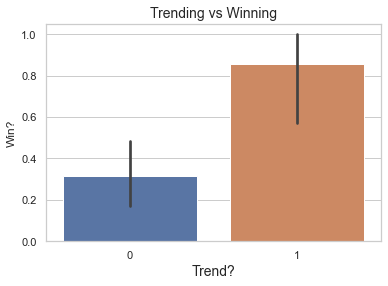

In [21]:
# Regression and analysis
log_reg = sm.Logit(nom_df['Win?'], nom_df[['Trend?']]).fit()
s = sns.barplot(x = "Trend?", y="Win?", data=nom_df)
plt.title("Trending vs Winning", fontsize=14)
plt.xlabel("Trend?", fontsize=14)
print(log_reg.summary()) 

This regression shows a much lower p value, but still too high to reject the null hypothesis. A positive correlation between trending and likelihood of winning relationship can also be seen in bar plot. What seperates trending and mentions, as explained by data scientist Gilad Lotan, is that "Twitter's algorithm determines what is trending by favoring sharp spikes rather than gradual sustained growth."  This means that Trends are determined by a combination of volume and how much time it takes to create volume, so this helps explain the stronger correlation in trends vs wins, as compared to mentions vs wins. Trends are more focused on volume of tweets, which means they are more likely to correlate with AMA winners is the winner trended arount the time of the AMAs.
Source: https://rethinkmedia.org/blog/how-does-twitter-decide-what-trending#:~:text=Twitter's%20algorithm%20determines%20what%20is,it%20takes%20to%20create%20volume.&text=Rather%2C%20the%20Twitter%20conversation%20simply%20built%20over%20time.

**Location Popularity vs Win**
The following code block examines the top 4 cities with the highest tweet volumes (Portland, Chicago, Pheonix, Long Beach) the artists with the highest tweet volumes, and compares the artists' popularity in that city (by determining the proportion of tweets in that city that went to each artist). A logistic regression is then performed on this data to understand which city has the highest impact on the winner, if any.

/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


         Current function value: 0.610630
         Iterations: 35


/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


                           Logit Regression Results                           
Dep. Variable:                   Win?   No. Observations:                   42
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.09522
Time:                        09:52:42   Log-Likelihood:                -25.646
converged:                      False   LL-Null:                       -28.346
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Portland    2269.8250   4.31e+06      0.001      1.000   -8.44e+06    8.45e+06

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is 

/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


                           Logit Regression Results                           
Dep. Variable:                   Win?   No. Observations:                   42
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.02065
Time:                        09:52:48   Log-Likelihood:                -27.760
converged:                       True   LL-Null:                       -28.346
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Phoenix       30.6653     37.228      0.824      0.410     -42.301     103.631
         Current function value: 0.610630
         Iterations: 35


/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


                           Logit Regression Results                           
Dep. Variable:                   Win?   No. Observations:                   42
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.09522
Time:                        09:53:02   Log-Likelihood:                -25.646
converged:                      False   LL-Null:                       -28.346
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Long Beach  1445.8949    2.7e+05      0.005      0.996   -5.28e+05    5.31e+05

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is 

/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/bissakakenah/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


                           Logit Regression Results                           
Dep. Variable:                   Win?   No. Observations:                   42
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                  0.1197
Time:                        09:53:19   Log-Likelihood:                -24.953
converged:                      False   LL-Null:                       -28.346
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Chicago     2043.1832   2.11e+07   9.69e-05      1.000   -4.13e+07    4.13e+07

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is 

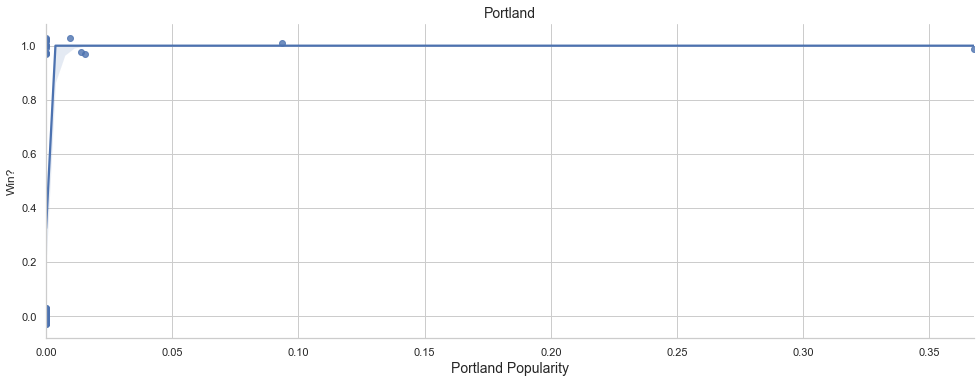

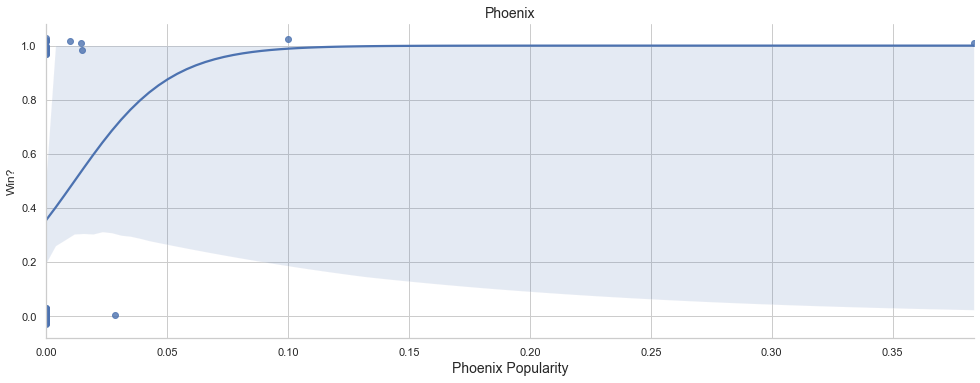

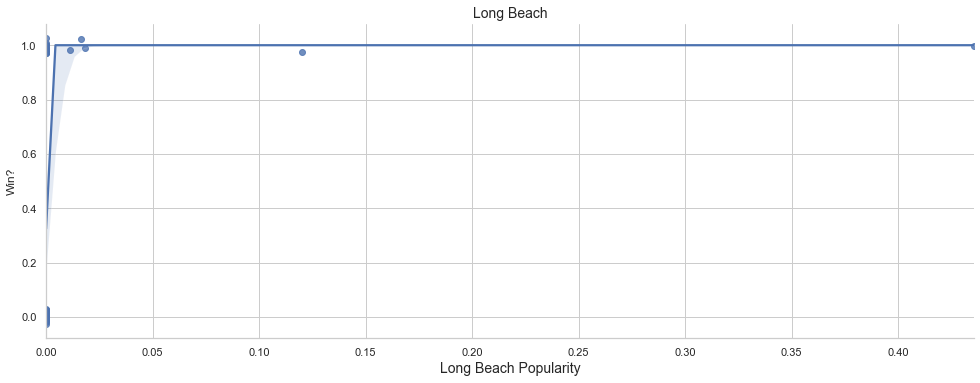

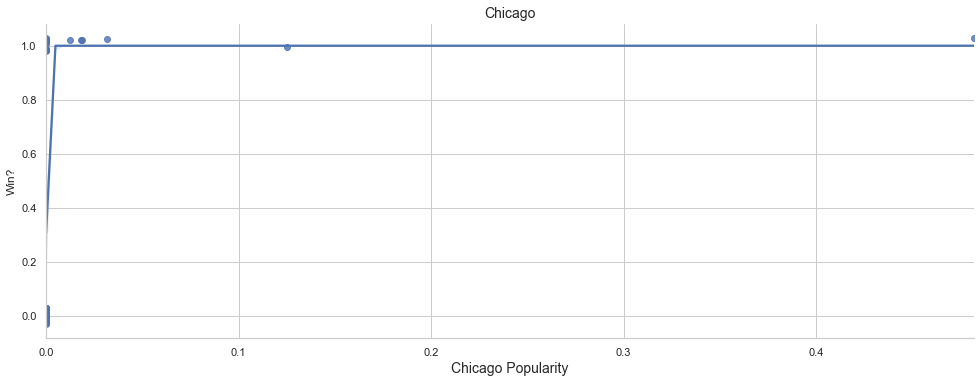

In [22]:
#for each trending artist, compare their tweet volume to the city's tweet volume, and create a logistic regression with their 
#likelihood to win based on that

for city in cities:
    temp_df = nom_trend[nom_trend['location'] == city]
    temp_df  = temp_df.groupby(['name']).mean()
    temp_df  = temp_df.reset_index()
    temp_df  = temp_df.sort_values(by='tweet_volume', ascending=False)
    temp_df = temp_df.dropna()
    temp_df = temp_df.reset_index(drop=True)
    nom_df[city] = 0.0
    for i in range (0, len(nom_df['nominee'])):
        for j in range (0, len(temp_df['tweet_volume'])):
            if nom_df.at[i, 'nominee'] in temp_df.at[j, 'name'] :
                k = loc_df[loc_df['location'] == city]['tweet_volume']
                l = temp_df.at[j, 'tweet_volume']/k.values[0]
                nom_df[city].loc[nom_df.nominee == nom_df.at[i, 'nominee']] = l
    # Regression and analysis
    log_reg = sm.Logit(nom_df['Win?'], nom_df[city]).fit()
    s = sns.lmplot(x = city, y="Win?", data=nom_df, logistic=True, n_boot=500, y_jitter=.03)
    plt.title(city, fontsize=14)
    plt.xlabel((city + " Popularity"), fontsize=14)
    s.fig.set_size_inches(15,5)
    print(log_reg.summary())




The five cities analyzed abouve had the highest tweet volumes, so the hypothesis here was that regressing wins based on a trending artist's popularity would be a stronger indicator in helping predict the winner. The popularity formila was af follows, with the example of Portland:

Portland popularity formula (only calculated for trending artists in portland): tweet volume/total portland ama tweet volume

Based on the high P-values, nothing can necessarily be concluded from this data, but the logistic results indicate that Portland is the strongest indicator of the winners, out of the 4 cities. This makes sense as it also has the highest tweet volumes, so it has a higher impact on the trending status of the artist

## Conlusion


**Wrapping Up**
When analyzing the data that we have collected, we can infer that the number of tweets an artists gets relating to the AMAs is not an ideal way of predicting the winners of the AMAs in that usually with award shows, it is more than a pure popularity contest. This is espeically apparent when there are several artists/groups that won an award that did not really trend, and have notable tweet volumes. In fact, there were notably quite a few more artists who won that did not trend compared to those that did trend, and won. Many of these categories are already pre-determined from the start which led to some artists that trended far below most others winning said category. Such examples include Marshmello, and Kane Brown winning categories such as [*Favorite EDM Artist*](https://www.theamas.com/winners/2018-winners/), and [*Favorite Male Country Artist*](https://www.theamas.com/winners/2018-winners/) despite not much traction with tweets, and not trending.

**Sources of error and Missing data**  
From the visualization of tweet volumes and tweets, there were some errors and missing data that needs to be addressed. One error is with the dataset itself, specifically amas_combined.csv. This dataset contains tweets with #AMA but does not categorize the nominee associated with the tweet. Due to this, we had to categorize each tweet with regular expression which is not perfect. This method does not represent the dataset on a true scale, and an improvement can be made with more accurate categories. Next, the missing data with tweet volumes. As mentioned earlier, many of the nominees did not trend at all. According to Elias Dabbas, the author of the dataset on kaggle, many of the trending topics trended too late or did not have enough tweets to generate a trend. Due to the missing data, the nominees that are less popular are not represent well in the tutorial.


**Future ideas**  
Throughout this data collection and analysis process, though some telling results were found, there is always room for improvement. Specifically, there are some enhanced assessments that could be performed to futher explore this data in order to obtain even more information. One example would be assessing previous years. This way, there would be more data points and those could help examine consistent trends accross years, in order to predict the followin years. 
In addition, because this data is based on Twitter, another area that could be explored is the number of followers an artist has, as that would probably be included in the error term of the statistical analysis because an artist may be talked about more because they have a lot of followers, not necessarily because their music is better. This may lead them to have a lot of mentions, but not win. Finally, it is important to note that some categories are more popular than others, so another future experiment could deal with Twitter discussions regarding categoriesin conjunction with artists, as artists may be discussed more if their category is popular, thus creating bias in the prediction.

**Links for more info**


Information on Twitter trends:

https://rethinkmedia.org/blog/how-does-twitter-decide-what-trending#:~:text=Twitter's%20algorithm%20determines%20what%20is,it%20takes%20to%20create%20volume.&text=Rather%2C%20the%20Twitter%20conversation%20simply%20built%20over%20time.

https://thesocialsavior.com/blog/how-does-twitter-go-about-deciding-whats-trending/

https://www.newsweek.com/how-do-twitter-trends-work-1526430

Information on AMA voting: 

https://www.theamas.com/2020-voting-rules/#:~:text=VOTING%20RESULTS%3A%20The%20total%20number,the%20winner%20of%20the%20Award.

